In [31]:
#IMPORTING NECESSARY LIBRARIES

%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import pickle

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

In [32]:
#IMPORTING DATA 
data = pd.read_csv('SMSdata.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
#DELETING IRRELEVANT COLUMNS AND RENAMING COLUMNS 
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})


In [34]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
#CHECKING SHAPE OF DATA 
data.shape

(5572, 2)

In [36]:
#counting the number of cases in each category 
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [37]:
# 0 : not spam/ham 1 : spam
data = data.replace(['ham','spam'],[0, 1])

In [38]:
data.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [39]:
import string
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [40]:

data['text'] = data['text'].apply(text_process)

In [41]:
data.head()

,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though


In [42]:
#dividing text and label 
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

In [43]:
text.head()


,text
0,Go jurong point crazy Available bugis n great ...
1,Ok lar Joking wif u oni
2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say early hor U c already say
4,Nah dont think goes usf lives around though


In [44]:
label.head()


,label
0,0
1,0
2,1
3,0
4,0


In [45]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  11305


In [46]:

## Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


In [47]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [48]:

### Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [49]:
## Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for ii, (_, text_) in enumerate(text.iterrows()):
    word_vectors[ii] = text_to_vector(text_[0])

In [50]:
word_vectors.shape

(5572, 11305)

In [51]:
#converting words to vectors using tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(5572, 9376)

In [52]:
#using tf-idf
#features = word_vectors
features = vectors

In [54]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, data['label'], test_size=0.15, random_state=111)

In [55]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4736, 9376)
(836, 9376)
(4736,)
(836,)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=54)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [78]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [99]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [108]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [sklearn.metrics.accuracy_score(y_test , pred)]))

In [109]:
predictions_word_vectors = pd.DataFrame.from_items(pred_scores_word_vectors,orient='index', columns=['Score'])
predictions_word_vectors

,Score
SVC,0.978469
KN,0.928230
NB,0.988038
DT,0.960526
LR,0.953349
RF,0.979665


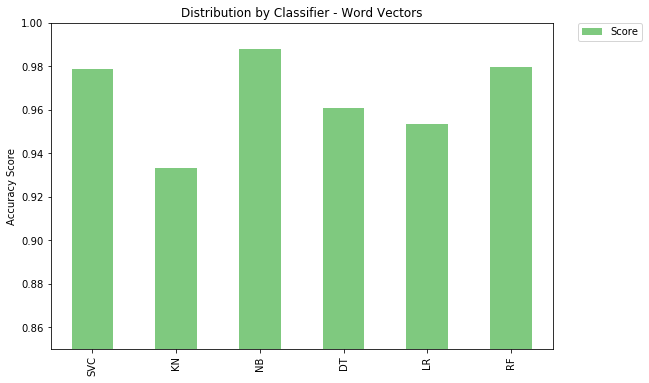

In [107]:
predictions_word_vectors.plot(kind='bar', ylim=(0.85,1.0), figsize=(9,6), align='center', colormap="Accent")
plt.xticks(np.arange(6), predictions_word_vectors.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier - Word Vectors')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [102]:

def find(p):
    if p == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [103]:
text = ["Free tones Hope you enjoyed your new content"]
integers = vectorizer.transform(text)

In [110]:

p = mnb.predict(integers)[0]
find(p)

Message is SPAM


In [111]:
text1 = ["Free tones Hope you enjoyed your new content"]
text2 = ["No. I meant the calculation is the same. That I'll call later"]
text3 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text4 = ["WINNER!! You just won a free ticket to Bahamas. Send your Details"]

integers1 = vectorizer.transform(text1)
integers2 = vectorizer.transform(text2)
integers3 = vectorizer.transform(text3)
integers4 = vectorizer.transform(text4)

In [114]:
p1 = mnb.predict(integers)[0]
p2 = knc.predict(integers)[0]
p3 = svc.predict(integers)[0]
p4 = rfc.predict(integers)[0]

find(p1)
find(p2)
find(p3)
find(p4)

Message is SPAM
Message is NOT Spam
Message is SPAM
Message is SPAM
